<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/array_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) *Descripcion del problema*

El sub arreglo maximo es un tipo de busqueda del arreglo maximo posible que tiene un arreglo.

Para ello tenemos la entrada de un arreglo[a1,......, an]

Y queremos que retorne un sub arreglo[ai,...., aj] tal que la suma de sus elementos sea mayor o igual a otros arreglos, se puede decir:


 $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.




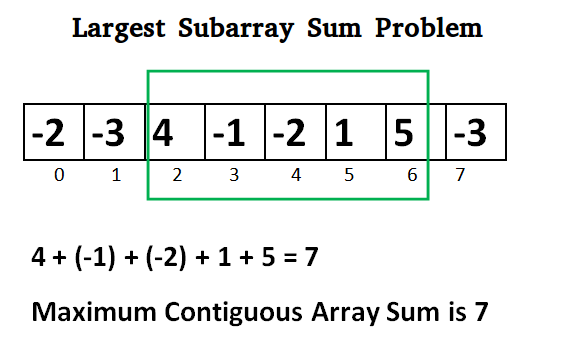

Como ejemplo de este tipo de busqueda, se puede aplicar en analisis de compra y venta, este te puede decir cuando seria conveniente realizar alguna compra o cuando seria conveniente vender.


# 2) *Codigo*





## 2.1) *forma recursiva*

In [73]:
from re import I
from typing_extensions import final
from sys import maxsize

def maxSubArray(arr, left = None, right = None, verbose = False):

    tamMax = -maxsize - 1
    finMax = 0
    
    if not n:
      return 0

    if left is None and right is None:
        left, right = 0, len(arr) - 1

    if(verbose == True):
      if(tamMax < finMax):
        tamMax = finMax
        if (left > right):
          return -10000

    if(verbose == False):
      if(tamMax < finMax):
        tamMax = finMax
        if (left > right):
          return -10000

      if (left == right):
          return arr[left]

    m = (left + right) // 2

    if(verbose == True):
      return max(maxSubArray(arr, left, m-1),
                maxSubArray(arr, m+1, right),
                MaxSubArrayMid(arr, left, m, right))
    else:
      return max(maxSubArray(arr, left, m-1),
                maxSubArray(arr, m+1, right),
                MaxSubArrayMid(arr, left, m, right))  
 
 
arr = [5, 8, -7, 99 , -55, 48,48,56,54,-77, 78]
n = len(arr)
 
max_sum = maxSubArray(arr, 0, n-1)
print("Maximum contiguous sum is ", max_sum)


Maximum contiguous sum is  257


In [37]:
def MaxSubArrayMid(arr, left, mid, right):
    global inicio 
    global final 
    suma = 0
    suma_iz = -10000
    
    for i in range(mid, left-1, -1):
        suma = suma + arr[i]
        if (suma > suma_iz):
            suma_iz = suma
            inicio = suma
            fin = i
  
    suma = 0
    suma_der = -1000
    for i in range(mid, right + 1):
        suma = suma + arr[i]
 
        if (suma > suma_der):
            suma_der = suma

    return max(suma_iz + suma_der - arr[mid], suma_iz, suma_der) 



## 2.2) forma no recursiva

In [112]:
import sys
def max_sub_array_noRecursivo(nums):
 
    maxSum = -sys.maxsize

    for i in range(len(nums)):
        total = 0  
        for j in range(i, len(nums)):
            total += nums[j]
            if total > maxSum:
                maxSum = total
    return maxSum
 
nums = [2, -4, 1, 9, -6, 7, -3]
print('La suma máxima es:', max_sub_array_noRecursivo(nums))

La suma máxima es: 11


# 2.3) Descripción del algoritmo

Tenemos un arreglo el cual busca en 3 partes del arreglo

*   En la izquierda
*   En la derecha
*   y en el centro

busca de forma recursiva en la parte izquierda y derecha del arreglo pero en el centro hace un recorrido con un ciclo "for" para buscar el arreglo del medio.

finalmete retorna la suma del arreglo mas grande





# 3) *Correctitud*

Demostracion de la correctitud de midSubArray y maxSubArray

## 3.1) maxSubArray


```
1) maxSubarray(array)
2)  if start = end
3)    return array[start]
4)  else
5)   middle = (start + end) / 2
6)    return max(maxSubarray(array(From start to middle)), maxSubarray(array(From middle + 1 to end)), maxCrossover(array))

```

inicialización:

Cuando el array de de largo 1 entonces

La linea 2 verifica que el inicio el igual que el final ya que a[0] = a[0]
por lo que es verdadero

Mantención:

si el array es de tamaño 2 entonces:

En la linea 2 el inicio y el final son diferente por lo que pasa a la siguiente linea

Luego divide el arreglo en 2

Para finalmente pasar a la linea 6 donde se ejecuta el return con las funciones dentro las cuales retornarian el maximo izquierdo, el derecho ademas del arreglo que cruza por la mitad


```
L[] = 1
R[] = 2
Cros[] = [1, 2]
```
esto cumple y es verdadero lo cual si funciona para un arreglo de tamaño 2 entonces para un arreglo de tamaño n tambien cumple.






## 3.2) *midSubArray*


```
1) maxCrossover(array)
2)  currentLeftSum = 0
3)      leftSum = 0
4)  currentRightSum = 0
5)      rightSum = 0
6)  for i in array
7)    currentLeftSum += array[i]
8)    if currentLeftSum > leftSum
9)      leftSum = currentLeftSum
10)  for i in array
11)    currentRightSum += array[i]
12)    if currentRightSum > rightSum
13)      rightSum = currentRightSum
14)  return leftSum + rightSum

```


Inicialización:

Cuado el array tiene un unico elemento entonces:

En la linea 6 al entrar el largo de array siendo este uno solo itera una unica vez

El codigo sigue ejecutando hasta la linea 10 la cual entra a otro "if" con la misma condición que el anterior por lo que tambien se ejecuta coorectamente

termina de ejecutar el segundo "if" para finalmente retornar la suma del primer y segundo "if"

Mantención:

para un array de tamaño 2 entonces:

En el "for" de la linea 6 como ahora el tamaño del array es 2 se ejecutara 2 veces como se cumple la inicialización para un valor repite los pasos para un solo valor en los "if"

```
6)  for i in array
10)  for i in array

```

al cumplir con los if el codigo se ejecuta de forma correcta repitiendo 2 veces el ciclo "for"

por lo que si para un array de tamaño 2 es correcto para un arreglo de tamaño n tambien será correcto



# 4) *Analisis del tiempo*

*TIempo de ejecucion* **"maxSubArray"**


Mejor caso : T(n) = 2T(n/2) + Θ(n) 



Para probar que el tiempo de ejecución es correcto podemos aplicar el teorema del maestro

Con este teorema afirmamos que:
tenemos un a = 2, b = 2, d = 1

eso nos da que el a = b^d

por consecuencia el tiempo de ejecucion sera de T(n) = O(nlogn)


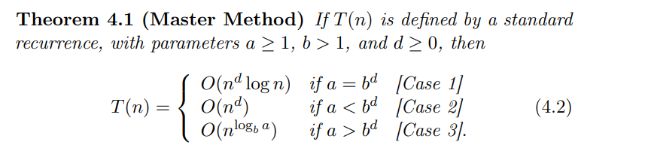


Tiempo de ejecucion de " ***MaxSubArrayMid*** "  


T(n) = Θ(n)

# 5) *Experimentos*

## 5.1) Grafico sub Array Max(recursive) vs kadane 

In [75]:
def kadane(A):
    max_so_far = 0
    max_ending_here = 0

    for i in A:
        max_ending_here = max_ending_here + i
        max_ending_here = max(max_ending_here, 0)
        max_so_far = max(max_so_far, max_ending_here)
 
    return max_so_far

a = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
 
print("La suma máxima del sub-arreglo: ", kadane(a))

La suma máxima del sub-arreglo:  6


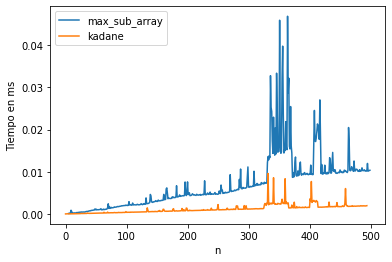

In [109]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; z=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a})", repeat=1, number=10)
  e = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(e)


plt.plot(x,y,z)
plt.legend(["max_sub_array","kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

## 5.2) Grafico sub Array Max(no recursivo) vs Kadane

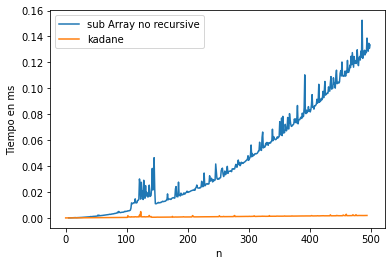

In [115]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
import numpy as np

x=[]; y=[]; z=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  b = np.random.randn(64,64)
  t = repeat(setup="from __main__ import max_sub_array_noRecursivo", stmt=f"max_sub_array_noRecursivo({a})", repeat=1, number=10)
  e = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(e)


plt.plot(x,y,z)
plt.legend(["sub Array no recursive","kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# 5.3) Analisis 